##1. Write a Python program that loads a dataset, splits it into training and testing sets, applies Logistic Regression, and prints the model accuracy.

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import load_iris


data = load_iris()
X = data.data
y = data.target

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [22]:
y_pred = model.predict(X_test)

In [23]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy:.2f}')

Model Accuracy: 1.00


In [24]:
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion)

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


##2. Write a Python program to apply L1 regularization (Lasso) on a dataset using LogisticRegression(penalty='l1')and print the model accuracy.

In [25]:

model1 = LogisticRegression(penalty='l1', solver='liblinear', max_iter=200)
model1.fit(X_train, y_train)

y_pred1 = model1.predict(X_test)

accuracy = accuracy_score(y_test, y_pred1)
print(f'Model Accuracy: {accuracy:.2f}')
confusion = confusion_matrix(y_test, y_pred1)
print('Confusion Matrix:')
print(confusion)

Model Accuracy: 1.00
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


##3. Write a Python program to train Logistic Regression with L2 regularization (Ridge) usingLogisticRegression(penalty='l2'). Print model accuracy and coefficients.

In [26]:

model2 = LogisticRegression(penalty='l2', solver='liblinear', max_iter=200)
model2.fit(X_train, y_train)

y_pred2 = model2.predict(X_test)

accuracy = accuracy_score(y_test, y_pred2)
print(f'Model Accuracy: {accuracy:.2f}')
confusion = confusion_matrix(y_test, y_pred2)
print('Confusion Matrix:')
print(confusion)

Model Accuracy: 1.00
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


##4. Write a Python program to train Logistic Regression with Elastic Net Regularization (penalty='elasticnet').


In [27]:

model3 = LogisticRegression(penalty='elasticnet', solver='saga',l1_ratio=0.5, max_iter=200)
model3.fit(X_train, y_train)

y_pred3 = model3.predict(X_test)

accuracy = accuracy_score(y_test, y_pred3)
print(f'Model Accuracy: {accuracy:.2f}')
confusion = confusion_matrix(y_test, y_pred3)
print('Confusion Matrix:')
print(confusion)

Model Accuracy: 1.00
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


##5. Write a Python program to train a Logistic Regression model for multiclass classification using multi_class='ovr'.

In [28]:
model4 = LogisticRegression(multi_class='ovr', solver='liblinear', max_iter=200)
model4.fit(X_train, y_train)

y_pred4 = model4.predict(X_test)

accuracy = accuracy_score(y_test, y_pred4)
print(f'Model Accuracy: {accuracy:.2f}')

print('Model Coefficients:', model4.coef_)


Model Accuracy: 1.00
Model Coefficients: [[ 0.3711229   1.409712   -2.15210117 -0.95474179]
 [ 0.49400451 -1.58897112  0.43717015 -1.11187838]
 [-1.55895271 -1.58893375  2.39874554  2.15556209]]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


##6. "C Write a Python program to apply GridSearchCV to tune the hyperparameters (C and penalty) of Logistic Regression. Print the best parameters and accuracy.

In [29]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
}

model = LogisticRegression(solver='liblinear', max_iter=200)
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
best_accuracy = accuracy_score(y_test, y_pred)

print(f'Best Parameters: {best_params}')
print(f'Best Model Accuracy: {best_accuracy:.2f}')



Best Parameters: {'C': 10, 'penalty': 'l1'}
Best Model Accuracy: 1.00


##7. Write a Python program to evaluate Logistic Regression using Stratified K-Fold Cross-Validation. Print the average accuracy.

In [30]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
model = LogisticRegression(solver='liblinear', max_iter=200)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cross_val_scores = cross_val_score(model, X, y, cv=skf, scoring='accuracy')

average_accuracy = np.mean(cross_val_scores)
print(f'Average Accuracy with Stratified K-Fold CV: {average_accuracy:.2f}')

Average Accuracy with Stratified K-Fold CV: 0.96


##8. Write a Python program to load a dataset from a CSV file, apply Logistic Regression, and evaluate its accuracy.

In [35]:
df = pd.read_csv('customer_churn_dataset.csv')
df

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0
...,...,...,...,...,...,...,...,...,...,...,...,...
64369,64370,45,Female,33,12,6,21,Basic,Quarterly,947,14,1
64370,64371,37,Male,6,1,5,22,Standard,Annual,923,9,1
64371,64372,25,Male,39,14,8,30,Premium,Monthly,327,20,1
64372,64373,50,Female,18,19,7,22,Standard,Monthly,540,13,1


In [52]:
df.drop('CustomerID', inplace = True, axis = 1)

In [51]:
df.Gender= df.Gender.map({'Female': 0, 'Male': 1})
df['Contract Length'] = df['Contract Length'].map({'Quarterly': 0, 'Monthly': 1, 'Annual': 2})
df['Subscription Type'] = df['Subscription Type'].map({'Basic': 0, 'Premium': 1, 'Standard' : 2})


In [38]:
df

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,22,0,25,14,4,27,0,1,598,9,1
1,41,0,28,28,7,13,2,1,584,20,0
2,47,1,27,10,2,29,1,2,757,21,0
3,35,1,9,12,5,17,1,0,232,18,0
4,53,0,58,24,9,2,2,2,533,18,0
...,...,...,...,...,...,...,...,...,...,...,...
64369,45,0,33,12,6,21,0,0,947,14,1
64370,37,1,6,1,5,22,2,2,923,9,1
64371,25,1,39,14,8,30,1,1,327,20,1
64372,50,0,18,19,7,22,2,1,540,13,1


In [39]:
y = df.iloc[:, -1]
X = df.iloc[:, :-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(solver='liblinear', max_iter=200)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy:.2f}')

Model Accuracy: 0.83


##9. Write a Python program to apply RandomizedSearchCV for tuning hyperparameters (C, penalty, solver) in Logistic Regression. Print the best parameters and accuracy.

In [42]:
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings("ignore")

In [43]:
param_dist = {
    'C': np.logspace(-4, 4, 20),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

model = LogisticRegression(max_iter=200)
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)

best_params = random_search.best_params_
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
best_accuracy = accuracy_score(y_test, y_pred)

print(f'Best Parameters: {best_params}')
print(f'Best Model Accuracy: {best_accuracy:.2f}')

Best Parameters: {'solver': 'liblinear', 'penalty': 'l1', 'C': 0.08858667904100823}
Best Model Accuracy: 0.83


##10. Write a Python program to implement One-vs-One (OvO) Multiclass Logistic Regression and print accuracy.

In [44]:
from sklearn.multiclass import OneVsOneClassifier

In [45]:

data = load_iris()
X = data.data  # Features
y = data.target  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = OneVsOneClassifier(LogisticRegression(solver='liblinear', max_iter=200))
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy (OvO): {accuracy:.2f}')

Model Accuracy (OvO): 1.00


##11. Write a Python program to train a Logistic Regression model and visualize the confusion matrix for binary classification.

In [55]:
df = pd.read_csv('customer_churn_dataset.csv')  # Replace 'dataset.csv' with your actual file name
df

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0
...,...,...,...,...,...,...,...,...,...,...,...,...
64369,64370,45,Female,33,12,6,21,Basic,Quarterly,947,14,1
64370,64371,37,Male,6,1,5,22,Standard,Annual,923,9,1
64371,64372,25,Male,39,14,8,30,Premium,Monthly,327,20,1
64372,64373,50,Female,18,19,7,22,Standard,Monthly,540,13,1


In [56]:
df.Gender= df.Gender.map({'Female': 0, 'Male': 1})
df['Contract Length'] = df['Contract Length'].map({'Quarterly': 0, 'Monthly': 1, 'Annual': 2})
df['Subscription Type'] = df['Subscription Type'].map({'Basic': 0, 'Premium': 1, 'Standard' : 2})
df

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,0,25,14,4,27,0,1,598,9,1
1,2,41,0,28,28,7,13,2,1,584,20,0
2,3,47,1,27,10,2,29,1,2,757,21,0
3,4,35,1,9,12,5,17,1,0,232,18,0
4,5,53,0,58,24,9,2,2,2,533,18,0
...,...,...,...,...,...,...,...,...,...,...,...,...
64369,64370,45,0,33,12,6,21,0,0,947,14,1
64370,64371,37,1,6,1,5,22,2,2,923,9,1
64371,64372,25,1,39,14,8,30,1,1,327,20,1
64372,64373,50,0,18,19,7,22,2,1,540,13,1


Model Accuracy: 0.81


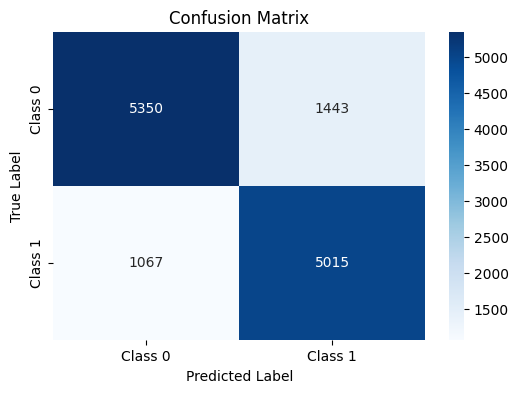

In [57]:


y = df.iloc[:, -1]  # Target variable
X = df.iloc[:, :-1]  # Features

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(solver='liblinear', max_iter=200)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy:.2f}')

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


##12. Write a Python program to train a Logistic Regression model and evaluate its performance using Precision, Recall, and F1-Score.

Model Accuracy: 0.81
Precision: 0.78
Recall: 0.82
F1-Score: 0.80


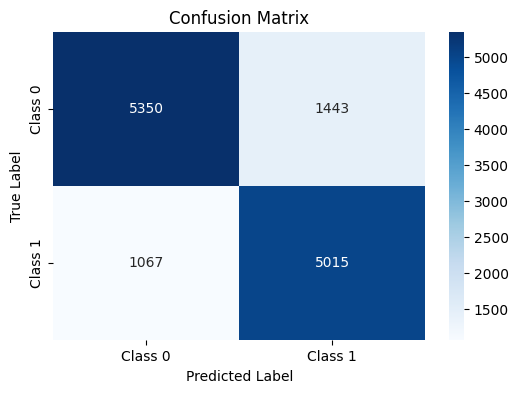

In [59]:
from sklearn.metrics import precision_score, recall_score, f1_score
model = LogisticRegression(solver='liblinear', max_iter=200)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

print(f'Model Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


##13. Write a Python program to train a Logistic Regression model on imbalanced data and apply class weights to improve model performance.

Model Accuracy: 0.80
Precision: 0.77
Recall: 0.85
F1-Score: 0.80


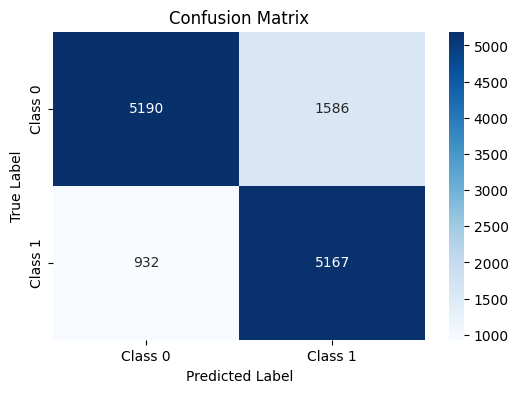

In [61]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)
class_weight_dict = {cls: weight for cls, weight in zip(np.unique(y), class_weights)}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

model = LogisticRegression(solver='liblinear', max_iter=200, class_weight=class_weight_dict)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

print(f'Model Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')

conf_matrix = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


#14. Write a Python program to train Logistic Regression on the Titanic dataset, handle missing values, and evaluate performance.

Model Accuracy: 0.79
Precision: 0.77
Recall: 0.67
F1-Score: 0.71


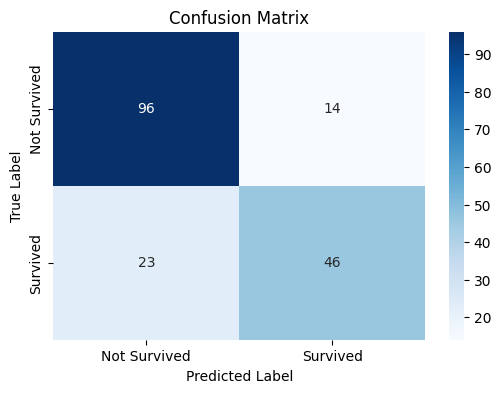

In [62]:

df = pd.read_csv('Titanic-Dataset.csv')

features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
df = df[features + ['Survived']]

df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

X = df.drop(columns=['Survived'])
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

model = LogisticRegression(solver='liblinear', max_iter=200)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Model Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


##15. Write a Python program to apply feature scaling (Standardization) before training a Logistic Regression model. Evaluate its accuracy and compare results with and without scaling.

Accuracy without Scaling: 0.79
Accuracy with Scaling: 0.80


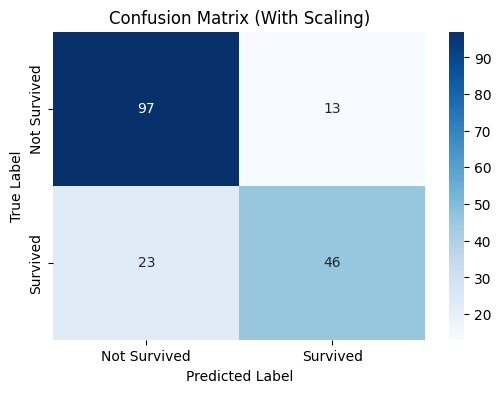

In [63]:
from sklearn.preprocessing import StandardScaler
model_no_scaling = LogisticRegression(solver='liblinear', max_iter=200)
model_no_scaling.fit(X_train, y_train)
y_pred_no_scaling = model_no_scaling.predict(X_test)
accuracy_no_scaling = accuracy_score(y_test, y_pred_no_scaling)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_scaled = LogisticRegression(solver='liblinear', max_iter=200)
model_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = model_scaled.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)

print(f'Accuracy without Scaling: {accuracy_no_scaling:.2f}')
print(f'Accuracy with Scaling: {accuracy_scaled:.2f}')

conf_matrix = confusion_matrix(y_test, y_pred_scaled)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (With Scaling)')
plt.show()


##16. Write a Python program to train Logistic Regression and evaluate its performance using ROC-AUC score.

Model Accuracy: 0.80
Precision: 0.78
Recall: 0.67
F1-Score: 0.72
ROC-AUC Score: 0.85


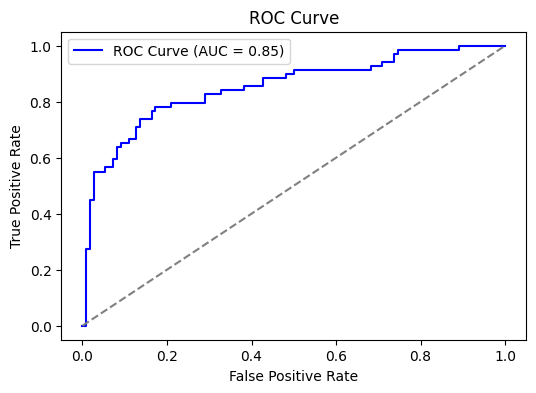

In [65]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
model = LogisticRegression(solver='liblinear', max_iter=200)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print(f'Model Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')
print(f'ROC-AUC Score: {roc_auc:.2f}')

fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


##17. Write a Python program to train Logistic Regression using a custom learning rate (C=0.5) and evaluate accuracy.

In [66]:
model = LogisticRegression(solver='liblinear', max_iter=200, C=0.5)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)

print(f'Model Accuracy with C=0.5: {accuracy:.2f}')


Model Accuracy with C=0.5: 0.80


##18. Write a Python program to train Logistic Regression and identify important features based on model coefficients.

Model Accuracy with C=0.5: 0.80

Feature Importance:
    Feature  Coefficient
1       Sex     1.266551
5      Fare     0.106799
4     Parch    -0.080727
6  Embarked    -0.183524
3     SibSp    -0.258036
2       Age    -0.481545
0    Pclass    -0.866667


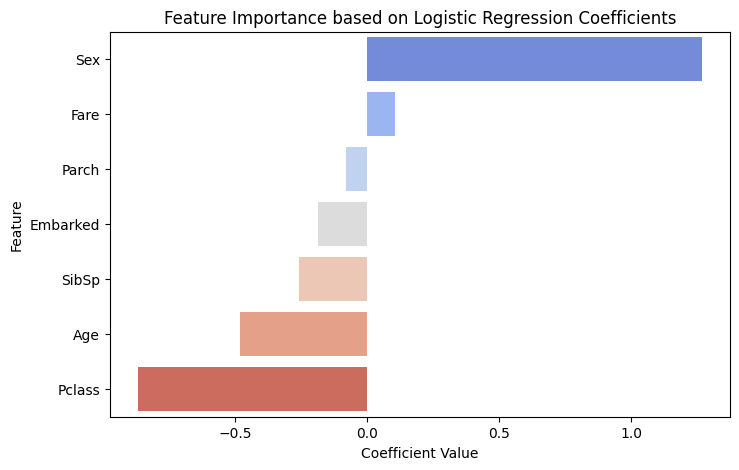

In [67]:
model = LogisticRegression(solver='liblinear', max_iter=200, C=0.5)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy with C=0.5: {accuracy:.2f}')

feature_importance = pd.DataFrame({'Feature': features, 'Coefficient': model.coef_[0]})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

plt.figure(figsize=(8, 5))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance, palette='coolwarm')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance based on Logistic Regression Coefficients')
plt.show()


##19. Write a Python program to train Logistic Regression and evaluate its performance using Cohen’s Kappa Score.

Model Accuracy with C=0.5: 0.80
Cohen's Kappa Score: 0.56

Feature Importance:
    Feature  Coefficient
1       Sex     1.266551
5      Fare     0.106799
4     Parch    -0.080727
6  Embarked    -0.183524
3     SibSp    -0.258036
2       Age    -0.481545
0    Pclass    -0.866667


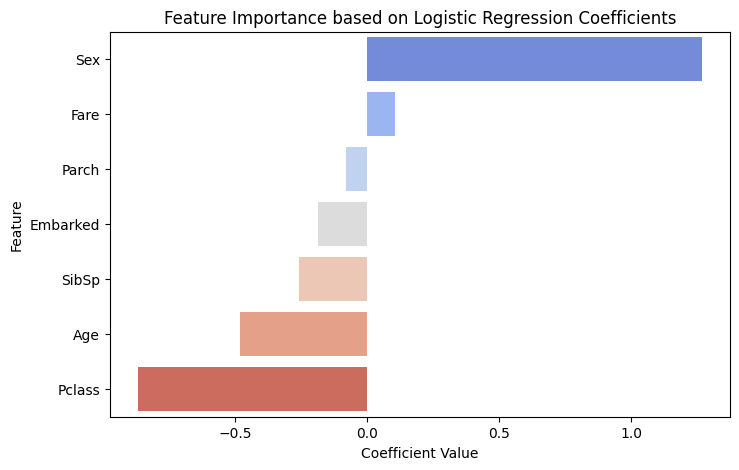

In [68]:
from sklearn.metrics import cohen_kappa_score
model = LogisticRegression(solver='liblinear', max_iter=200, C=0.5)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
kappa_score = cohen_kappa_score(y_test, y_pred)

print(f'Model Accuracy with C=0.5: {accuracy:.2f}')
print(f'Cohen\'s Kappa Score: {kappa_score:.2f}')

feature_importance = pd.DataFrame({'Feature': features, 'Coefficient': model.coef_[0]})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

plt.figure(figsize=(8, 5))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance, palette='coolwarm')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance based on Logistic Regression Coefficients')
plt.show()


##20. Write a Python program to train Logistic Regression and visualize the Precision-Recall Curve for binary classification

Precision-Recall AUC: 0.79


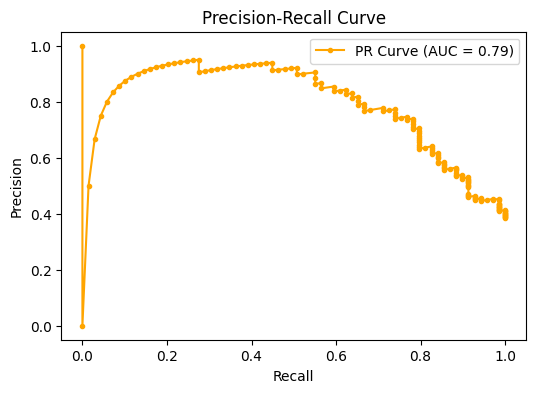

In [71]:
from sklearn.metrics import precision_recall_curve

model = LogisticRegression(solver='liblinear', max_iter=200, C=0.5)
model.fit(X_train_scaled, y_train)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

precision, recall, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall, precision)

print(f'Precision-Recall AUC: {pr_auc:.2f}')

plt.figure(figsize=(6, 4))
plt.plot(recall, precision, marker='.',color= 'orange', label=f'PR Curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


##21. Write a Python program to train Logistic Regression with different solvers (liblinear, saga, lbfgs) and compare their accuracy.

Accuracy with solver liblinear: 0.80
Accuracy with solver saga: 0.80
Accuracy with solver lbfgs: 0.80


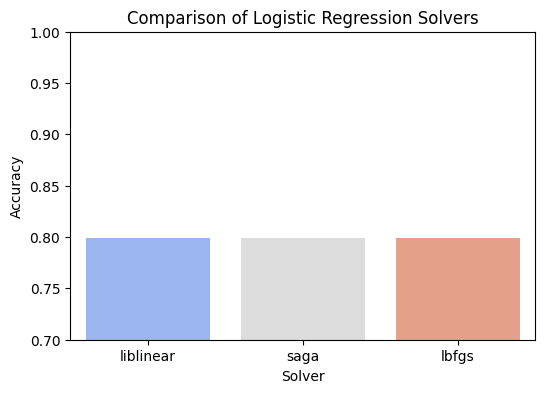

In [72]:
solvers = ['liblinear', 'saga', 'lbfgs']
results = {}

for solver in solvers:
    model = LogisticRegression(solver=solver, max_iter=200, C=0.5)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    results[solver] = accuracy
    print(f'Accuracy with solver {solver}: {accuracy:.2f}')

plt.figure(figsize=(6, 4))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette='coolwarm')
plt.xlabel('Solver')
plt.ylabel('Accuracy')
plt.title('Comparison of Logistic Regression Solvers')
plt.ylim(0.7, 1.0)
plt.show()

##22. Write a Python program to train Logistic Regression and evaluate its performance using Matthews Correlation Coefficient (MCC).

Model Accuracy: 0.80
Matthews Correlation Coefficient (MCC): 0.57


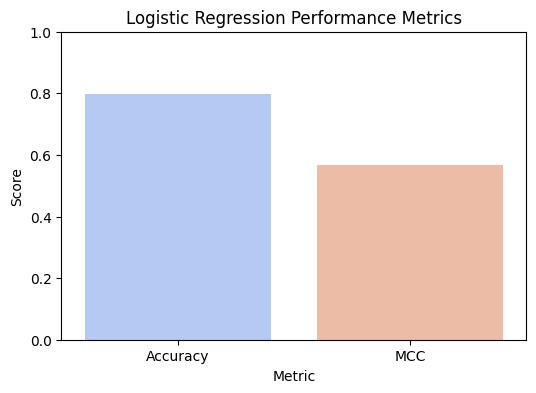

In [74]:
from sklearn.metrics import matthews_corrcoef

model = LogisticRegression(solver='liblinear', max_iter=200, C=0.5)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

print(f'Model Accuracy: {accuracy:.2f}')
print(f'Matthews Correlation Coefficient (MCC): {mcc:.2f}')

plt.figure(figsize=(6, 4))
sns.barplot(x=['Accuracy', 'MCC'], y=[accuracy, mcc], palette='coolwarm')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.title('Logistic Regression Performance Metrics')
plt.ylim(0, 1)
plt.show()


##23Write a Python program to train Logistic Regression on both raw and standardized data. Compare their accuracy to see the impact of feature scaling.

Accuracy without Scaling: 0.79
Accuracy with Scaling: 0.80


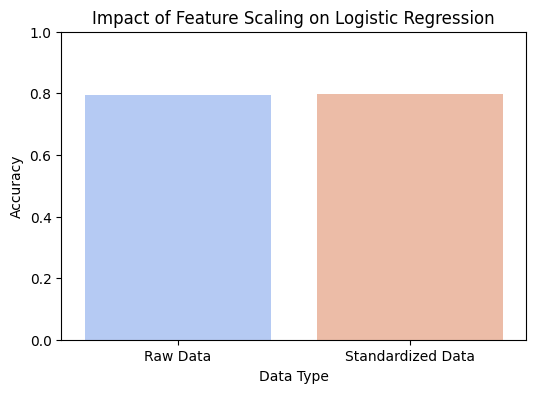

In [77]:
model_raw = LogisticRegression(solver='liblinear', max_iter=200)
model_raw.fit(X_train, y_train)
y_pred_raw = model_raw.predict(X_test)
accuracy_raw = accuracy_score(y_test, y_pred_raw)

model_scaled = LogisticRegression(solver='liblinear', max_iter=200)
model_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = model_scaled.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)

print(f'Accuracy without Scaling: {accuracy_raw:.2f}')
print(f'Accuracy with Scaling: {accuracy_scaled:.2f}')

plt.figure(figsize=(6, 4))
sns.barplot(x=['Raw Data', 'Standardized Data'], y=[accuracy_raw, accuracy_scaled], palette='coolwarm')
plt.xlabel('Data Type')
plt.ylabel('Accuracy')
plt.title('Impact of Feature Scaling on Logistic Regression')
plt.ylim(0, 1)
plt.show()

##24. Write a Python program to train Logistic Regression and find the optimal C (regularization strength) using cross-validation.

Optimal C value: 0.0215
Model Accuracy with Optimal C: 0.80


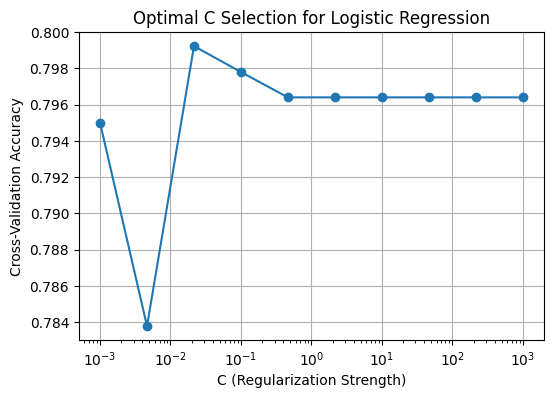

In [78]:
param_grid = {'C': np.logspace(-3, 3, 10)}

grid_search = GridSearchCV(LogisticRegression(solver='liblinear', max_iter=200), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

best_C = grid_search.best_params_['C']
model = LogisticRegression(solver='liblinear', max_iter=200, C=best_C)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

print(f'Optimal C value: {best_C:.4f}')
print(f'Model Accuracy with Optimal C: {accuracy:.2f}')

cv_results = grid_search.cv_results_
plt.figure(figsize=(6, 4))
plt.semilogx(param_grid['C'], cv_results['mean_test_score'], marker='o', linestyle='-')
plt.xlabel('C (Regularization Strength)')
plt.ylabel('Cross-Validation Accuracy')
plt.title('Optimal C Selection for Logistic Regression')
plt.grid()
plt.show()


##25 Write a Python program to train Logistic Regression, save the trained model using joblib, and load it again to make predictions.

In [79]:
import joblib

model = LogisticRegression(solver='liblinear', max_iter=200)
model.fit(X_train_scaled, y_train)

joblib.dump(model, 'logistic_regression_model.pkl')
print("Model saved successfully.")

loaded_model = joblib.load('logistic_regression_model.pkl')
print("Model loaded successfully.")

y_pred = loaded_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy after Loading: {accuracy:.2f}')


Model saved successfully.
Model loaded successfully.
Model Accuracy after Loading: 0.80
